In [1]:
import ROOT
from ROOT import RooRealVar,RooCBShape,RooDataHist,RooArgList,RooFit
import glob
import os
import array as array
import ctypes
import json
import csv

INFO:SparkMonitorKernel:SparkMonitor comm opened from frontend.


Welcome to JupyROOT 6.26/08

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
reader = csv.reader(open('data/runlist.csv', 'r'))
dict_run_crystal = {}
for row in reader:
    run,energy,gain,crystal,_,_,_ = row
    crystal=crystal[:2]
    #if crystal=='C3':continue
    if gain =='switch':
        dict_run_crystal[crystal] = run
    if gain == 'G1' and (crystal=='B5' or crystal=='C5' or crystal=='D5'):
        #print(run,gain,crystal)
        dict_run_crystal[crystal] = run
print(len(dict_run_crystal))
print((dict_run_crystal))

25
{'C3': '14918', 'C2': '14982', 'D2': '14983', 'D3': '14984', 'D4': '14985', 'C4': '14987', 'B4': '14988', 'B3': '14989', 'B2': '14990', 'B1': '14991', 'C1': '14992', 'D1': '14999', 'E1': '15000', 'E2': '15001', 'E3': '15002', 'E4': '15003', 'E5': '15004', 'A1': '15005', 'A2': '15006', 'A3': '15007', 'A4': '15008', 'A5': '15009', 'B5': '15035', 'C5': '15040', 'D5': '15045'}


In [4]:
crystal_dic={'A1':0,'A2':1,'A3':2,'A4':3,'A5':4,'B1':5,'B2':6,'B3':7,'B4':8,'B5':9,'C1':10,'C2':11,'C3':12,'C4':13,'C5':14,'D1':15,'D2':16,'D3':17,'D4':18,'D5':19,'E1':20,'E2':21,'E3':22,'E4':23,'E5':24}
tree_dic={}
#crystal="C3"
for crystal in crystal_dic.keys():
    run=(dict_run_crystal[crystal])
    path="/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/%s/*"%run
    allfiles_list = [f for f in glob.glob(path) if f.endswith(".root")]
    tree_dic[crystal] = ROOT.TChain("h4")
    entry=0
    for file in allfiles_list:
        #f=ROOT.TFile()        
        ## Corrupted File is not opening
        try:
            f = ROOT.TFile.Open(file)
        except:
            continue
        ## Corrupted file is Zombie    
        if(f is None or f.IsZombie()): 
            continue
            
        ## h4 tree is missing from the file
        if(int(f.GetListOfKeys().Contains("h4")) == 0):
            print(f.GetName())
            continue
        entry+=1
        tree_dic[crystal].Add(file)
    print(crystal,run,tree_dic[crystal].GetEntries())
    print(len(allfiles_list),entry)


A1 15005 100134
39 39
A2 15006 103997
40 40
A3 15007 104882
40 40
A4 15008 191509
73 73
A5 15009 99688
39 38
B1 14991 137265
53 53
B2 14990 99670
39 39
B3 14989 99068
38 38
B4 14988 179589
71 70
B5 15035 110686
43 43
C1 14992 99828
38 38
C2 14982 108292
42 42
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/14918/15.root
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/14918/24.root
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/14918/29.root
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/14918/30.root
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/14918/67.root
/eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/14918/74.root
C3 14918 247417
74 68
C4 14987 100625
40 40


Warning in <TClass::Init>: no dictionary for class PositionMeasurement is available
Warning in <TClass::Init>: no dictionary for class TrackPar is available
Warning in <TClass::Init>: no dictionary for class Tracking::TelescopeLayer is available
Warning in <TClass::Init>: no dictionary for class Tracking::TelescopeLayout is available
Warning in <TClass::Init>: no dictionary for class CfgManager is available
Error in <TFile::Init>: file /eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/15009/1.root is truncated at 33161216 bytes: should be 46277398, trying to recover
Info in <TFile::Recover>: /eos/cms/store/group/dpg_ecal/comm_ecal/upgrade/testbeam/ECALTB_H4_Oct2021/HighPurity/ntuples_fitVFEs/15009/1.root, recovered key Tracking::TelescopeLayout:TrackFit_telescope_layout at address 32175480
Warning in <TFile::Init>: successfully recovered 1 keys
Error in <TFile::ReadBuffer>: error reading all requested bytes from file /eos/cms/store/gr

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


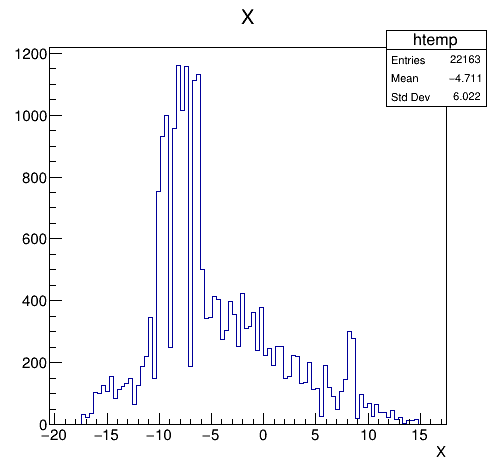

In [5]:
c5=ROOT.TCanvas("c5","c5",500,500)
cryst="A3"
tree_dic[cryst].Draw("X")
c5.Draw()

15005
100134
crystal A1
xmax1 -1.4714384825552236
ymax1 -1.0974296838451165
15006
103997
crystal A2
xmax1 -1.601489435567521
ymax1 -1.269290217174418
15007
104882
crystal A3
xmax1 -1.3915378522167627
ymax1 -1.1183450636388685
15008
191509
crystal A4
xmax1 -1.337395944488747
ymax1 -1.1384646659145978
15009
99688
crystal A5
xmax1 -1.3684163193521994
ymax1 -1.3961320356089109
14991
137265
crystal B1
xmax1 -1.5983493555105932
ymax1 -1.2226228775843124
14990
99670
crystal B2
xmax1 -1.6582210374036102
ymax1 -1.23352473527911
14989
99068
crystal B3
xmax1 -1.433537002605489
ymax1 -1.2453439968662776
14988
179589
crystal B4
xmax1 -1.56371721760256
ymax1 -1.2459087937216546
15035
110686
crystal B5
xmax1 -1.4356938527654164
ymax1 -1.2067422202747802
14992
99828
crystal C1
xmax1 -1.616278430860042
ymax1 -1.2762036584702467
14982
108292
crystal C2
xmax1 -1.5496801272494172
ymax1 -1.122605816158533
14918
247417
crystal C3
xmax1 -0.0543855620238609
ymax1 -1.4921630096350564
14987
100625
crystal C4
xm

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots/crystal_map.pdf has been created
Info in <TCanvas::Print>: png file plots/crystal_map.png has been created


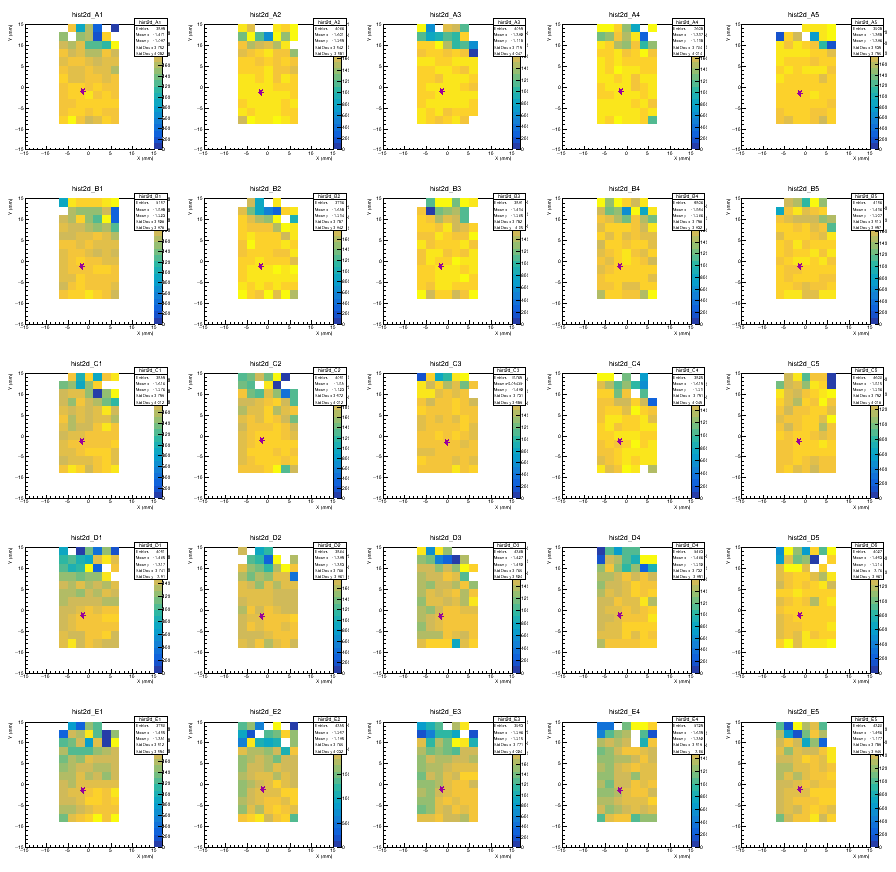

In [8]:
#allfiles_list
ROOT.TStyle().SetOptStat(0)

crystal_maps=[]
c = ROOT.TCanvas("c","c",900,900)
c.Divide(5,5)
canvas_num=0
grmax={}
hist2d_dic={}
center_dic={}

crystal_dic={'A1':0,'A2':1,'A3':2,'A4':3,'A5':4,'B1':5,'B2':6,'B3':7,'B4':8,'B5':9,'C1':10,'C2':11,'C3':12,'C4':13,'C5':14,'D1':15,'D2':16,'D3':17,'D4':18,'D5':19,'E1':20,'E2':21,'E3':22,'E4':23,'E5':24}

for crystal in crystal_dic.keys():
    
    run = dict_run_crystal[crystal]
    print(crystal,run)
    tree = tree_dic[crystal]
    tree.SetBranchStatus("*",1)
   
    print(tree.GetEntries())   
    
    hist2d_dic[crystal] = ROOT.TProfile2D("hist2d_%s"%(crystal),"hist2d_%s"%(crystal),15,-15,15,15,-15,15)

    for i,evt in enumerate(tree):
        
        #if(i>10):
            #print(evt.fit_ampl[evt.D3])
            #break
            #print("type:",len(evt.X),len(evt.Y))
        if(evt.n_tracks==1 and evt.trg == evt.PHYS and evt.fit_ampl[evt.MCP1]>200 and abs(evt.X[0])<7 and evt.Y[0] > -9 and evt.Y[0]<14):    
            hist2d_dic[crystal].Fill(evt.X[0],evt.Y[0],evt.fit_ampl[crystal_dic[crystal]])
            hist2d_dic[crystal].GetXaxis().SetTitle('X (mm)')
            hist2d_dic[crystal].GetYaxis().SetTitle('Y (mm)')
            
    
    c.cd(canvas_num+1)
    c.SetRightMargin(0.18)
    hist2d_dic[crystal].Draw("PROFCOLZsame")

    xmax1=hist2d_dic[crystal].GetMean(1)
    ymax1=hist2d_dic[crystal].GetMean(2)
    #xmax2 =  ctypes.c_int(0)
    #ymax2 = ctypes.c_int(0)
    #zmax2 = ctypes.c_int(0)
    #b=hist2d_dic[crystal].GetMaximumBin()
    #b=hist2d_dic[crystal].FindBin(hist2d_dic[crystal].GetMaximum())
    hist2d_dic[crystal].SetStats(0)
    #hist2d_dic[crystal].GetZaxis().SetRangeUser(0,hist2d_dic[crystal].GetBinContent(b))
    print("crystal",crystal)
    print("xmax1",xmax1)
    print("ymax1",ymax1)
    #print("xmax2",xmax2)
    #print("ymax2",ymax2)
    #print("getmaximumbin",hist2d_dic[crystal].GetMaximumBin())
    #print("findbin",hist2d_dic[crystal].FindBin(hist2d_dic[crystal].GetMaximum()))
    #print(b,hist2d_dic[crystal].GetBinContent(xmax.value,ymax.value),xmax.value,ymax.value)
    #print(b,hist2d_dic[crystal].GetBinContent(b))
    #print(hist2d_dic[crystal].GetXaxis().GetBinCenter(xmax.value),hist2d_dic[crystal].GetYaxis().GetBinCenter(ymax.value))

    ### star marker for max amplitude
    #grmax[crystal] = ROOT.TGraph(1,array.array( 'd' ,[hist2d_dic[crystal].GetXaxis().GetBinCenter(xmax.value)]),array.array( 'd' ,[hist2d_dic[crystal].GetYaxis().GetBinCenter(ymax.value)]))
    grmax[crystal] = ROOT.TGraph(1,array.array( 'd' ,[xmax1]),array.array( 'd' ,[ymax1]))

    grmax[crystal].SetMarkerColor(ROOT.kMagenta+2);
    grmax[crystal].SetMarkerStyle(29);
    grmax[crystal].SetMarkerSize(1.2);
    grmax[crystal].Draw("LPsame")
    
    
    #grmax1[crystal] = ROOT.TGraph(1,array.array( 'd' ,[hist2d_dic[crystal].GetXaxis().GetBinCenter(xmax2.value)]),array.array( 'd' ,[hist2d_dic[crystal].GetYaxis().GetBinCenter(ymax2.value)]))
    #grmax1[crystal].SetMarkerColor(ROOT.kRed+2);
    #grmax1[crystal].SetMarkerStyle(29);
    #grmax1[crystal].SetMarkerSize(1.2);
    #grmax1[crystal].Draw("LPsame")
    
    #center_dic[crystal]=[hist2d_dic[crystal].GetXaxis().GetBinCenter(xmax.value), hist2d_dic[crystal].GetYaxis().GetBinCenter(ymax.value)]
    center_dic[crystal]=[xmax1,ymax1]
    
    
    canvas_num+=1
    #c.Update()
    #file_num+=1
c.Draw()

c.SaveAs('plots/crystal_map_C2.pdf')
c.SaveAs('plots/crystal_map_C2.png')

print("center",center_dic)

center_json = json.dumps(center_dic, indent=4)
with open("data/crystal_centers_C2.json", "w") as outfile:
    outfile.write(center_json)



In [6]:
## Loading center 

f = open('data/crystal_centers.json')

dict_crystal_centers = json.load(f)
print(dict_crystal_centers)

{'A1': [-1.4714384825552236, -1.0974296838451165], 'A2': [-1.601489435567521, -1.269290217174418], 'A3': [-1.3915378522167627, -1.1183450636388685], 'A4': [-1.337395944488747, -1.1384646659145978], 'A5': [-1.3684163193521994, -1.3961320356089109], 'B1': [-1.5983493555105932, -1.2226228775843124], 'B2': [-1.6582210374036102, -1.23352473527911], 'B3': [-1.433537002605489, -1.2453439968662776], 'B4': [-1.56371721760256, -1.2459087937216546], 'B5': [-1.4356938527654164, -1.2067422202747802], 'C1': [-1.616278430860042, -1.2762036584702467], 'C2': [-1.5496801272494172, -1.122605816158533], 'C3': [-0.0543855620238609, -1.4921630096350564], 'C4': [-1.6187141676040648, -1.2304616780908555], 'C5': [-1.514710339316921, -1.2355621854345435], 'D1': [-1.4447410427696097, -1.3174529529837113], 'D2': [-1.3993406064956015, -1.3829982132604106], 'D3': [-1.4266343042253644, -1.4820441056038025], 'D4': [-1.4458159544686884, -1.2319135263397758], 'D5': [-1.4626892752814062, -1.213711699499322], 'E1': [-1.4

15005
100134
peak_postion 2250.0
15006
103997
peak_postion 2150.0
15007
104882
peak_postion 2050.0
15008
191509
peak_postion 2150.0
15009
99688
peak_postion 2250.0
14991
137265
peak_postion 2350.0
14990
99670
peak_postion 2450.0
14989
99068
peak_postion 2150.0
14988
179589
peak_postion 2150.0
14992
99828
peak_postion 2250.0
14982
108292
peak_postion 2350.0
14918
247417
peak_postion 2050.0
14987
100625
peak_postion 2150.0
15040
117177
peak_postion 1650.0
14999
104828
peak_postion 1850.0
14983
100452
peak_postion 2250.0
14984
109614
peak_postion 1950.0
14985
139764
peak_postion 2150.0
15045
100630
peak_postion 1750.0
15000
99238
peak_postion 2250.0
15001
112741
peak_postion 2450.0
15002
102498
peak_postion 2250.0
15003
151011
peak_postion 1850.0
15004
111801
peak_postion 1750.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: pdf file plots/hist_ampl.pdf has been created
Info in <TCanvas::Print>: png file plots/hist_ampl.png has been created


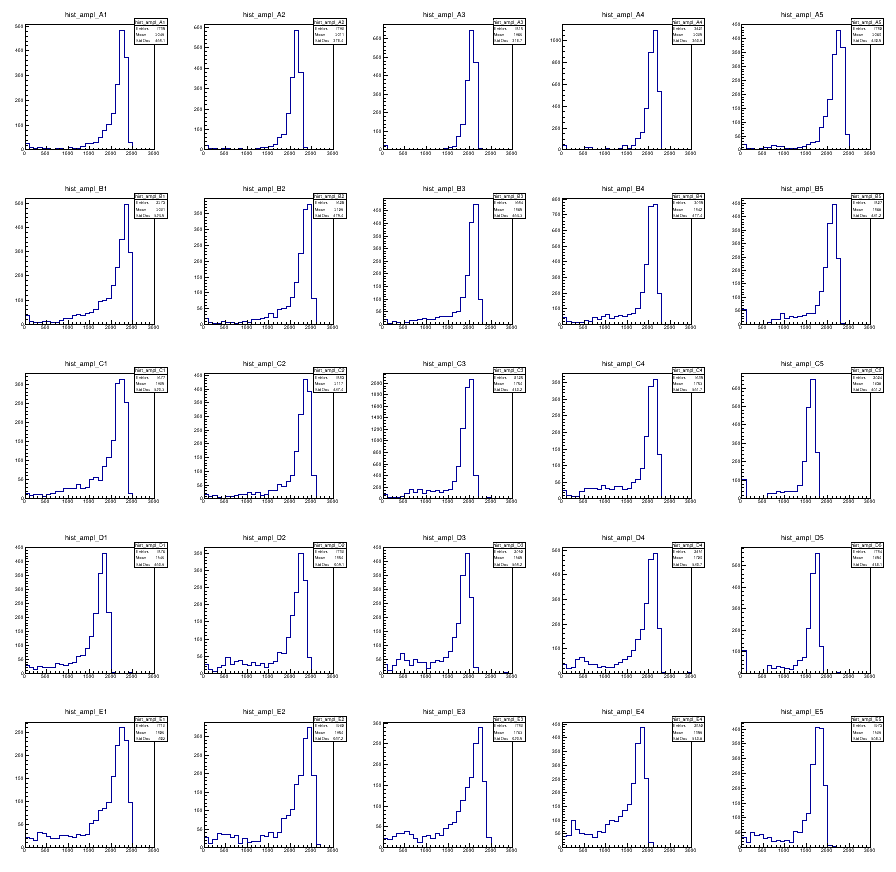

In [11]:
pos_cut = 4

c = ROOT.TCanvas("c","c",900,900)
c.Divide(5,5)
canvas_num=0
files=[]
file_num=0
chi2s = []
results = []
hists_fits=[]
trees=[]
x,roohist,m,s,a,n,sig,res,frame = [],[],[],[],[],[],[],[],[]

hist_ampl={}

for crystal in crystal_dic.keys():
    
    run = dict_run_crystal[crystal]
    print(crystal,run)

    tree = tree_dic[crystal]
    tree.SetBranchStatus("*",1)
   
    print(tree.GetEntries())
    hist_ampl[crystal] = ROOT.TH1F("hist_ampl_%s"%crystal,"hist_ampl_%s"%crystal,30,0,3000)
    for i,evt in enumerate(tree):
        #if(i>20): break
        if(evt.n_tracks==1 and abs(evt.X[0]-(dict_crystal_centers[crystal][0]))<pos_cut and abs(evt.Y[0]-(dict_crystal_centers[crystal][1]))<pos_cut and evt.trg == evt.PHYS and evt.fit_ampl[evt.MCP1]>200 ):        
            hist_ampl[crystal].Fill(evt.fit_ampl[crystal_dic[crystal]])
    
    c.cd(canvas_num+1)
    
    peak_position = hist_ampl[crystal].GetXaxis().GetBinCenter(hist_ampl[crystal].GetMaximumBin())
    print("peak_postion",peak_position)
    hist_ampl[crystal].Draw("same")
    canvas_num+=1
c.Draw()
c.SaveAs("plots/hist_ampl.pdf")
c.SaveAs("plots/hist_ampl.png")

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha_A1     5.00000e-01  2.50000e-01    0.00000e+00  1.00000e+01
     2 exp_A1       7.00000e+00  3.50000e+00    0.00000e+00  1.50000e+02
     3 mean_A1      2.00000e+03  1.50000e+02    1.50000e+03  3.00000e+03
     4 sigma_A1     6.00000e+01  3.00000e+01    0.00000e+00  5.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        2000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1

Info in <TCanvas::Print>: pdf file plots/fit.pdf has been created
Info in <TCanvas::Print>: png file plots/fit.png has been created


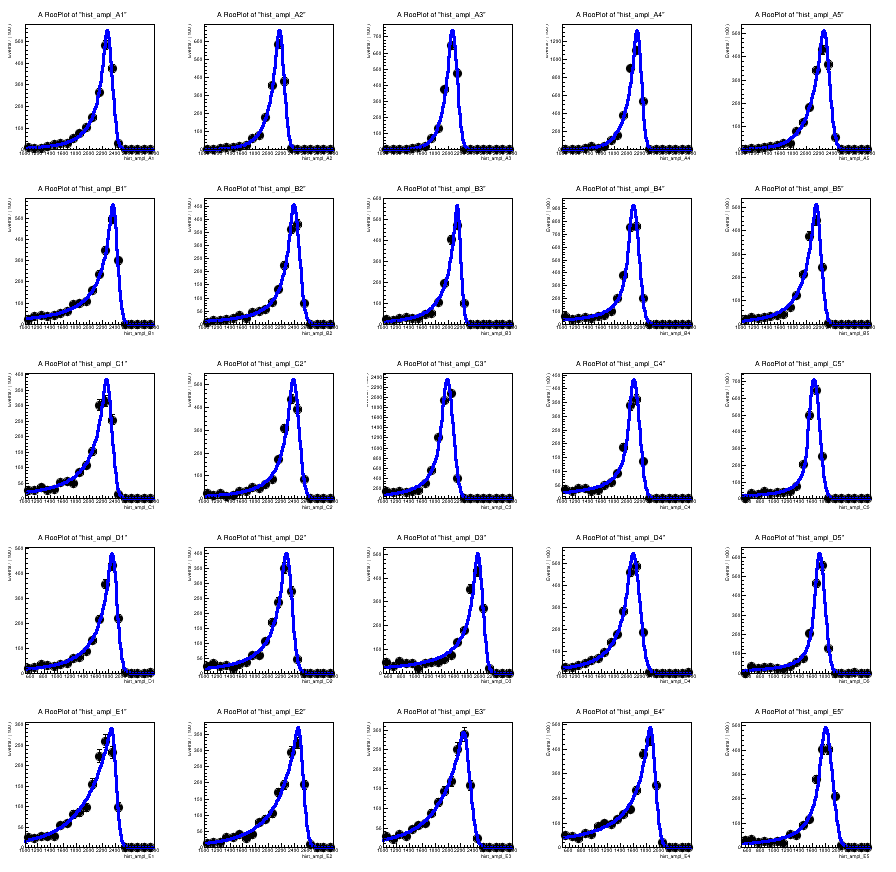

In [12]:
#### Fit the hist_ampl histograms

x={}
roohist={}
m={}
s={}
a={}
n={}
sig={}
res={}
frame={}
cfit = ROOT.TCanvas("cfit","cfit",900,900)
cfit.Divide(5,5)
canvas_num=0
dict_energy_means={}
crystal_tuneFit = ['C5','D1','D3','D5','E4','E5']
for crystal in hist_ampl.keys():
    
    cfit.cd(canvas_num+1)
    #scale = 1.3
    #x[crystal]  = RooRealVar(hist_ampl[crystal].GetName(),hist_ampl[crystal].GetName(),max(0.,peak_position*(1-scale)),peak_position*(1+scale))

    if crystal in crystal_tuneFit:
        x[crystal]  = RooRealVar(hist_ampl[crystal].GetName(),hist_ampl[crystal].GetName(),500,2500)
    else:
        x[crystal]  = RooRealVar(hist_ampl[crystal].GetName(),hist_ampl[crystal].GetName(),1000,3000)
    roohist[crystal] = RooDataHist("roohist_fit_%s"%crystal,"roohist_fit_%s"%crystal,RooArgList(x[crystal]),hist_ampl[crystal])

    if crystal in crystal_tuneFit:
        m[crystal]  = RooRealVar("mean_%s"%crystal,"mean_%s"%crystal,1500,500,2500)
    else:
        m[crystal]  = RooRealVar("mean_%s"%crystal,"mean_%s"%crystal,2000,1500,3000)
        
    #m[crystal]  = RooRealVar("mean_%s"%crystal,"mean_%s"%crystal,peak_position,peak_position*0.8,peak_position*1.2)    
    #m[crystal]  = RooRealVar("mean_%s"%crystal,"mean_%s"%crystal,2500,2000,3000)
    s[crystal]  = RooRealVar("sigma_%s"%crystal,"sigma_%s"%crystal,60,0,500)
    a[crystal]  = RooRealVar("alpha_%s"%crystal,"alpha_%s"%crystal,0.5,0,10)
    n[crystal]  = RooRealVar("exp_%s"%crystal,"exp_%s"%crystal,7,0,150)
    sig[crystal] = RooCBShape("signal_%s"%crystal,"signal_%s"%crystal,x[crystal],m[crystal],s[crystal],a[crystal],n[crystal])
    res[crystal] = sig[crystal].fitTo(roohist[crystal],RooFit.Save())
    res[crystal].Print()

    frame[crystal] = x[crystal].frame()
    roohist[crystal].plotOn(frame[crystal],RooFit.Name("roohist_test")),sig[crystal].plotOn(frame[crystal],RooFit.Name("signal_test"))
    frame[crystal].Draw()
    dict_energy_means[crystal] = ['CBmean',[m[crystal].getVal(),m[crystal].getError()],['CBsigma',s[crystal].getVal(),s[crystal].getError()]]
    canvas_num+=1
cfit.Draw()
cfit.SaveAs("plots/fit.pdf")
cfit.SaveAs("plots/fit.png")

fit_param_json = json.dumps(dict_energy_means, indent=4)
with open("data/fit_param.json", "w") as outfile:
    outfile.write(fit_param_json)


### Intercalibration constants from Fits.

In [3]:
## opening fit parameters file

f = open('data/fit_param.json')

fit_param = json.load(f)
print("fit mean at C2: ",fit_param["C2"][1:2][0][0])


fit mean at C2:  2381.6948059769766


In [4]:
crystal_dic={'A1':0,'A2':1,'A3':2,'A4':3,'A5':4,'B1':5,'B2':6,'B3':7,'B4':8,'B5':9,'C1':10,'C2':11,'C3':12,'C4':13,'C5':14,'D1':15,'D2':16,'D3':17,'D4':18,'D5':19,'E1':20,'E2':21,'E3':22,'E4':23,'E5':24}
InterCalibration_C2={}

for crystal in crystal_dic.keys():
    ic = fit_param['C2'][1:2][0][0]/fit_param[crystal][1:2][0][0]
    InterCalibration_C2[crystal] = ic
#InterCalibration_C2
intercalib_C2_json = json.dumps(InterCalibration_C2, indent=4)
with open("data/intercalib_C2_json.json", "w") as outfile:
    outfile.write(intercalib_C2_json)

### Energy C3_3x3

14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 2350.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0
14982
108292
peak_postion 50.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


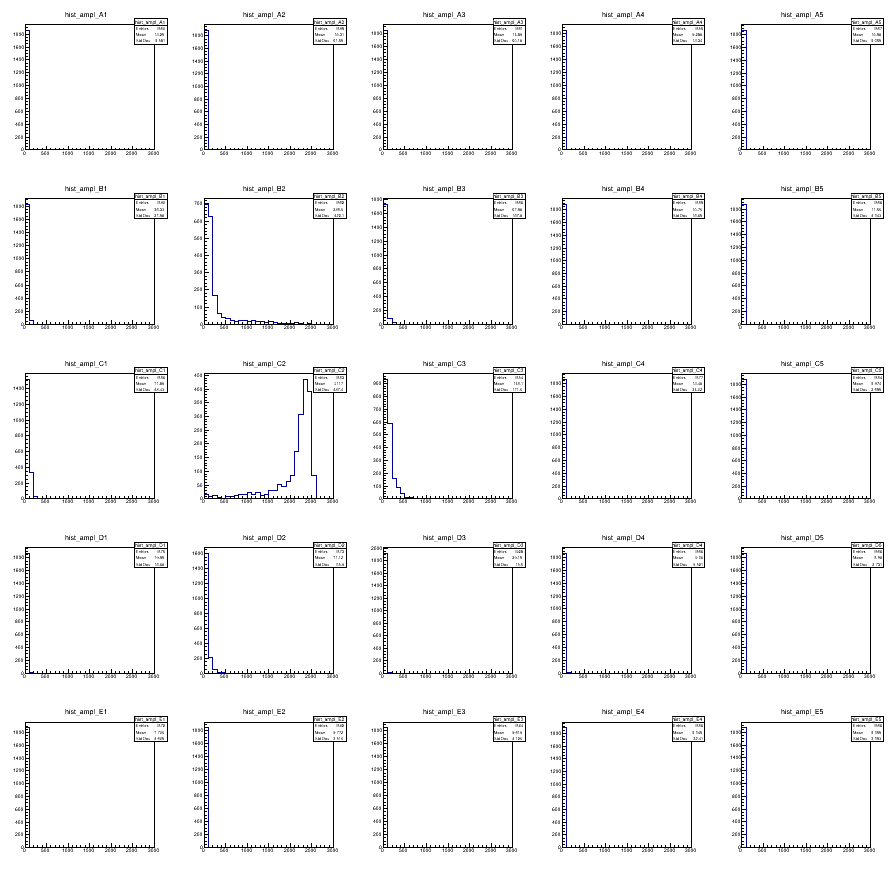

In [11]:
## Define 3x3 and 5x5 array surrounds C3 crystal

matrix_3x3 = 'B3,C3,D3,B2,C2,D2,B1,C1,D1'.split(',')
#matrix_3x3 = 'B1,C1,D1,B2,C2,D2,B3,C3,D3'.split(',')

matrix_5x5 = list(crystal_dic.keys())




pos_cut = 4

c = ROOT.TCanvas("c","c",900,900)
c.Divide(5,5)
canvas_num=0
trees=[]

hist_ampl={}

run=14918  ## for crystal C3



for crystal in crystal_dic.keys():
    
    run = dict_run_crystal['C2']
    print(run)

    tree = tree_dic['C2']
    tree.SetBranchStatus("*",1)
   
    print(tree.GetEntries())
    hist_ampl[crystal] = ROOT.TH1F("hist_ampl_%s"%crystal,"hist_ampl_%s"%crystal,30,0,3000)
    for i,evt in enumerate(tree):
        if(evt.n_tracks==1 and abs(evt.X[0]-(dict_crystal_centers[crystal][0]))<pos_cut and abs(evt.Y[0]-(dict_crystal_centers[crystal][1]))<pos_cut and evt.trg == evt.PHYS and evt.fit_ampl[evt.MCP1]>200 ):
            hist_ampl[crystal].Fill(evt.fit_ampl[crystal_dic[crystal]])
    
    c.cd(canvas_num+1)
    
    peak_position = hist_ampl[crystal].GetXaxis().GetBinCenter(hist_ampl[crystal].GetMaximumBin())
    print("peak_postion",peak_position)
    hist_ampl[crystal].Draw("same")
    canvas_num+=1

c.Draw()





Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


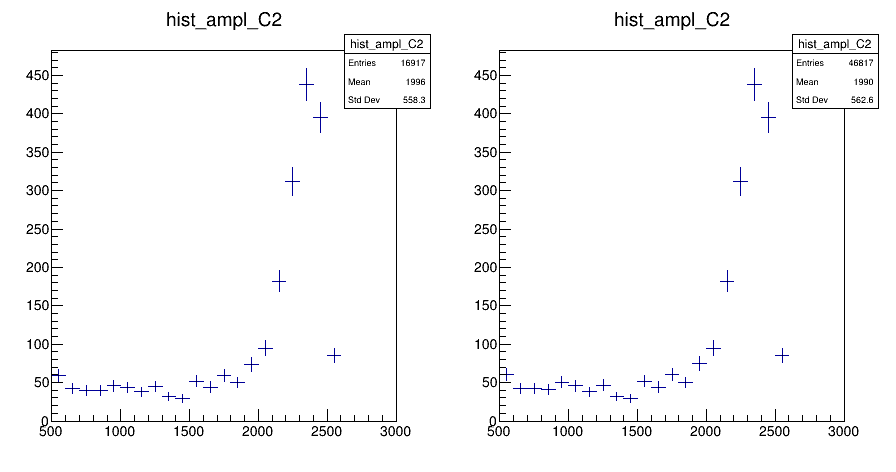

In [12]:
hist_ampl_3x3 = ROOT.TH1F("hist_ampl_3x3","hist_ampl_3x3",30,0,3000)
hist_ampl_5x5 = ROOT.TH1F("hist_ampl_5x5","hist_ampl_5x5",30,0,3000)

hist_ampl_3x3 = hist_ampl['C2'].Clone()
hist_ampl_5x5 = hist_ampl['C2'].Clone()

hist_ampl_sums = {}

for crystal in matrix_5x5:
    if(crystal == 'C2'): 
        continue
    if crystal in matrix_3x3:
        hist_ampl_3x3.Add(InterCalibration_C2[crystal]*hist_ampl[crystal])
    
    hist_ampl_5x5.Add(InterCalibration_C2[crystal]*hist_ampl[crystal])

        

c1 = ROOT.TCanvas("c","c",900,500)
c1.Divide(2,1)

c1.cd(1)
hist_ampl_3x3.GetXaxis().SetRangeUser(500,3000)
hist_ampl_sums["3x3"]=hist_ampl_3x3
hist_ampl_3x3.Draw() 

c1.cd(2)
hist_ampl_5x5.GetXaxis().SetRangeUser(500,3000)
hist_ampl_sums["5x5"]=hist_ampl_5x5
hist_ampl_5x5.Draw() 

c1.Draw()

[#0] WARNING:InputArguments -- RooAbsPdf::fitTo(signal_3x3) WARNING: a likelihood fit is requested of what appears to be weighted data.
       While the estimated values of the parameters will always be calculated taking the weights into account,
       there are multiple ways to estimate the errors of the parameters. You are advised to make an 
       explicit choice for the error calculation:
           - Either provide SumW2Error(true), to calculate a sum-of-weights-corrected HESSE error matrix
             (error will be proportional to the number of events in MC).
           - Or provide SumW2Error(false), to return errors from original HESSE error matrix
             (which will be proportional to the sum of the weights, i.e., a dataset with <sum of weights> events).
           - Or provide AsymptoticError(true), to use the asymptotically correct expression
             (for details see https://arxiv.org/abs/1911.01303).
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeCo

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cfit


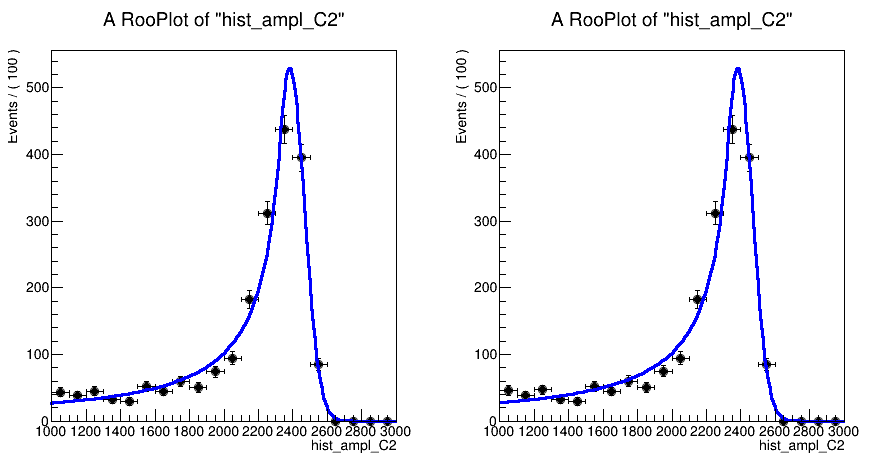

In [14]:
x={}
roohist={}
m={}
s={}
a={}
n={}
sig={}
res={}
frame={}
cfit = ROOT.TCanvas("cfit","cfit",900,500)
cfit.Divide(2,1)
canvas_num=0
dict_energy_means={}
sum_energies={}



for sums in hist_ampl_sums.keys():
    
    cfit.cd(canvas_num+1)
    peak_position = hist_ampl_sums[sums].GetXaxis().GetBinCenter(hist_ampl_sums[sums].GetMaximumBin())
    mean_position = hist_ampl_sums[sums].GetMean()
    ymax_value = hist_ampl_sums[sums].GetMaximum()

    scale = 1.3
    #if crystal in crystal_tuneFit:
    x[sums]  = RooRealVar(hist_ampl_sums[sums].GetName(),hist_ampl_sums[sums].GetName(),1000,3000)
    #else:
    #    x[crystal]  = RooRealVar(hist_ampl[crystal].GetName(),hist_ampl[crystal].GetName(),1000,3000)
    roohist[sums] = RooDataHist("roohist_fit_%s"%sums,"roohist_fit_%s"%sums,RooArgList(x[sums]),hist_ampl_sums[sums])

    #if crystal in crystal_tuneFit:
    m[sums]  = RooRealVar("mean_%s"%sums,"mean_%s"%sums,peak_position,peak_position*0.7,peak_position*1.3)

    #m[crystal]  = RooRealVar("mean_%s"%crystal,"mean_%s"%crystal,2500,2000,3000)
    s[sums]  = RooRealVar("sigma_%s"%sums,"sigma_%s"%sums,80,0,500)
    a[sums]  = RooRealVar("alpha_%s"%sums,"alpha_%s"%sums,0.8,0,2)
    n[sums]  = RooRealVar("exp_%s"%sums,"exp_%s"%sums,7,0,150)
    sig[sums] = RooCBShape("signal_%s"%sums,"signal_%s"%sums,x[sums],m[sums],s[sums],a[sums],n[sums])
    res[sums] = sig[sums].fitTo(roohist[sums],RooFit.Save())
    res[sums].Print()

    frame[sums] = x[sums].frame()
    roohist[sums].plotOn(frame[sums],RooFit.Name("roohist_test")),sig[sums].plotOn(frame[sums],RooFit.Name("signal_test"))
    frame[sums].Draw()
    dict_energy_means[sums] = ['CBmean',[m[sums].getVal(),m[sums].getError()],['CBsigma',s[sums].getVal(),s[sums].getError()]]
    sum_energies[sums]=m[sums].getVal()
    
    canvas_num+=1

cfit.Draw()



In [15]:
print("sum_energies_3: ",sum_energies['3x3'])
print("sum_energies_5: ",sum_energies['5x5'])

print("mean['C3']: ",m['3x3'].getVal())

sum_energies_3:  2383.4750918526142
sum_energies_5:  2383.5772954678905
mean['C3']:  2383.4750918526142
